In [2]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import pickle
from dataset_def import Dataset
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# data generating script
def place_cube(matrix, origin, r):
    #dim = matrix.shape()
    matrix[
    origin[0]-r:origin[0]+r,
    origin[1]-r:origin[1]+r,
    origin[2]-r:origin[2]+r,
    ] = 1
    return matrix

def dist3D(x, y):
    return math.sqrt(
        (x[0]-y[0])**2+
        (x[1]-y[1])**2+
        (x[2]-y[2])**2
        )

def place_sphere(matrix, origin, r):
    for index, x in np.ndenumerate(matrix):
        if dist3D(index, origin) <= r:
            matrix[index] = 1
    return matrix

# data generating script
def place_square(matrix, origin, r):
    #dim = matrix.shape()
    matrix[
    origin[0]-r:origin[0]+r,
    origin[1]-r:origin[1]+r,
    ] = 1
    return matrix

def dist2D(x, y):
    return math.sqrt(
        (x[0]-y[0])**2+
        (x[1]-y[1])**2
        )

def place_circle(matrix, origin, r):
    for index, x in np.ndenumerate(matrix):
        if dist2D(index, origin) <= r:
            matrix[index] = 1
    return matrix

def random_3D_shapes(m_size,num):
    shapes = np.zeros((num,m_size,m_size,m_size))
    labels = np.zeros((num,2))
    shape_types = np.random.randint(low = 0,high = 2,size= num)
    
    for i in range(num):
        r = np.random.randint(low = 3,high = np.floor(m_size/2-1))
        org = np.random.randint(low = r + 1,high = m_size - r - 1, size = 3)
        if shape_types[i] == 0:
            shapes[i,:,:,:] = place_cube(shapes[i,:,:,:],org,r)
            labels[i,0] = 1
        elif shape_types[i] == 1:
            shapes[i,:,:,:] = place_sphere(shapes[i,:,:,:],org,r)
            labels[i,1] = 1
            
    return shapes, labels

def random_2D_shapes(m_size,num):
    shapes = np.zeros((num,m_size,m_size))
    labels = np.zeros((num,2))
    shape_types = np.random.randint(low = 0,high = 2,size= num)
    
    for i in range(num):
        r = np.random.randint(low = 3,high = np.floor(m_size/2-1))
        org = np.random.randint(low = r + 1,high = m_size - r - 1, size = 2)
        if shape_types[i] == 0:
            shapes[i,:,:] = place_square(shapes[i,:,:],org,r)
            labels[i,0] = 1
        elif shape_types[i] == 1:
            shapes[i,:,:] = place_circle(shapes[i,:,:],org,r)
            labels[i,1] = 1
            
    return shapes, labels
        
# def random_2D_shapes_wn(m_size,num, sigma = 0):
#     shapes = np.zeros((num,m_size,m_size))
#     labels = np.zeros((num,2))
#     shape_types = np.random.randint(low = 0,high = 2,size= num)
    
#     for i in range(num):
#         r = np.random.randint(low = 3,high = np.floor(m_size/2-1))
#         org = np.random.randint(low = r + 1,high = m_size - r - 1, size = 2)
#         if shape_types[i] == 0:
#             shapes[i,:,:] = add_noise(place_square(shapes[i,:,:],org,r),sigma = sigma)
#             labels[i,0] = 1
#         elif shape_types[i] == 1:
#             shapes[i,:,:] = add_noise(place_circle(shapes[i,:,:],org,r),sigma = sigma)
#             labels[i,1] = 1
            
#     return shapes, labels
        

def matching_3D_shapes(m_size, num):
    cubes = np.zeros((m_size,m_size,m_size,num))
    spheres = np.zeros((m_size,m_size,m_size,num))
    for i in range(num):
        r = np.random.randint(low = 3,high = np.floor(m_size/2-1))
        org = np.random.randint(low = r + 1,high = m_size - r - 1, size = 3)
        cubes[:,:,:,i] = place_cube(cubes[:,:,:,i],org,r)
        spheres[:,:,:,i] = place_sphere(spheres[:,:,:,i],org,r)
    return cubes, spheres

def add_noise(matrix, mu = 0, sigma = 0):
    s = matrix + np.random.normal(mu, sigma, matrix.shape)

In [4]:
data, labels = random_3D_shapes(28,100)
print(data.shape)
data_r = data.reshape((100,28**3))
print(data_r.shape)
data_r2 = data.reshape(100,28,28,28)
print(np.sum(np.sum(data == data_r2)))
x = tf.reshape(data_r, shape=[-1, 28, 28, 28, 1])
x.shape

(100, 28, 28, 28)
(100, 21952)
2195200


TensorShape([Dimension(100), Dimension(28), Dimension(28), Dimension(28), Dimension(1)])

In [320]:
# Save 2D shape datasets
m_size = 28

# Train
num = 1000

data, labels = random_2D_shapes(m_size,num)
data = data.reshape((num,m_size*m_size))
train_dataset = Dataset(data.astype(np.float32),labels.astype(np.int8))

# Test
num = 100

data, labels = random_2D_shapes(m_size,num)
data = data.reshape((num,m_size*m_size))
test_dataset = Dataset(data.astype(np.float32),labels.astype(np.int8))

#Binary data


with open('data/shapes/2D_train_dataset.pickle', 'wb') as output:
    pickle.dump(train_dataset, output)
with open('data/shapes/2D_test_dataset.pickle', 'wb') as output:
    pickle.dump(test_dataset, output)
    
#np.save('data/shapes/2D_small_dataset.npy', data.astype(np.float32))
#np.save('data/shapes/2D_small_labels.npy', labels.astype(np.int32))

27
[0 1]


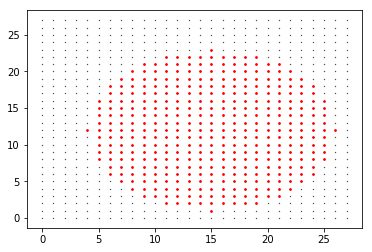

In [328]:
# View resulting shapes
i = i + 1
print(i)
shapes = test_dataset.data
labels = test_dataset.labels
shapes = shapes.reshape((num,m_size,m_size))
matrix = shapes[i,:,:]
print(labels[i])
fig = plt.figure()
ax = fig.add_subplot(111)
x,y = np.where(matrix == 0)
ax.scatter(x, y, c= 'black', s = 0.1)
x,y = np.where(matrix == 1)
ax.scatter(x, y, c= 'red', s = 3)

plt.show()

In [160]:
data = np.load('data/2D_small_data.npy')
print(data.shape)
print(data.shape)
labels = np.load('data/2D_small_labels.npy')
print(labels.shape)

(100, 784)
(100, 784)
(100, 2)


In [201]:
i = 0
num = 1000
m_size = 28

9
[1 0]


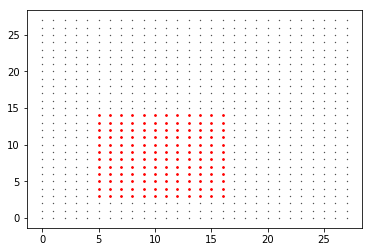

In [210]:
# Plot 2D rand shapes
i = i + 1
print(i)
shapes = train_dataset.data
labels = train_dataset.labels
shapes = shapes.reshape((num,m_size,m_size))
matrix = shapes[i,:,:]
print(labels[i])
fig = plt.figure()
ax = fig.add_subplot(111)
x,y = np.where(matrix == 0)
ax.scatter(x, y, c= 'black', s = 0.1)
x,y = np.where(matrix == 1)
ax.scatter(x, y, c= 'red', s = 3)

plt.show()

In [163]:
# Plot 3D rand shapes
i = i + 1
shapes = train_dataset.data
shapes = data.reshape((num,m_size,m_size,m_size))
matrix = shapes[:,:,i]
print(labels[i])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z,x,y = np.where(matrix == 0)
ax.scatter(x, y, -z, zdir='z', c= 'black', s = 0.1)
z,x,y = np.where(matrix == 1)
ax.scatter(x, y, -z, zdir='z', c= 'red', s = 3)

plt.show()

ValueError: cannot reshape array of size 78400 into shape (1000,28,28,28)

In [62]:
data

<closed file 'data/shapes/2D_test_dataset.pickle', mode 'rb' at 0x115457a50>

In [66]:
train_dataset.data.shape

(1000, 784)

In [6]:
# Save 3D shape datasets
m_size = 28

# Train
num = 10000

data, labels = random_3D_shapes(m_size,num)
data = data.reshape((num,m_size**3))
print(data.shape)
train_dataset = Dataset(data.astype(np.float32),labels.astype(np.int8))

# Test
num = 1000

data, labels = random_3D_shapes(m_size,num)
data = data.reshape((num,m_size**3))
test_dataset = Dataset(data.astype(np.float32),labels.astype(np.int8))

#Binary data


with open('data/shapes/3D_train_dataset.pickle', 'wb') as output:
    pickle.dump(train_dataset, output)
with open('data/shapes/3D_test_dataset.pickle', 'wb') as output:
    pickle.dump(test_dataset, output)

(10000, 21952)
